In [8]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print("IQR(", IQR, ") =", "Q3(", Q3, ")- Q1(", Q1, ")")

# This code calculates the Interquartile Range (IQR) of the 'Age' column in the dataframe 'df'.
# The first line calculates the 25th percentile of the 'Age' column and assigns it to variable Q1. 
# The second line calculates the 75th percentile of the 'Age' column and assigns it to variable Q3.
# The third line calculates the difference between Q3 and Q1 and assigns it to variable IQR. 
# Finally, the code prints the value of IQR along with the values of Q1 and Q3 for reference.

IQR( 17.875 ) = Q3( 38.0 )- Q1( 20.125 )


 the IQR of the 'Age' column is 17.875, which means that 50% of the values lie within this range (from Q1 to Q3).

In [7]:
lower_limit=Q1-IQR
upper_limit=Q3+IQR
lower_limit,upper_limit

(2.25, 55.875)

Based on the IQR, the lower and upper limits have been calculated as follows:

Lower Limit = Q1 - 1.5 * IQR = 20.125 - 1.5 * 17.875 = 2.25 

Upper Limit = Q3 + 1.5 * IQR = 38.0 + 1.5 * 17.875 = 55.875

These limits are used to identify outliers in the 'Age' column of the dataset. Any value less than the lower limit or greater than the upper limit is considered as an outlier.

In [8]:
df_without_outliers=df[(df['Age']>lower_limit)&(df['Age']<upper_limit)]
df_without_outliers
# creating a new DataFrame called "df_without_outliers".
# This new DataFrame is created by selecting only the rows from the original DataFrame "df" where the "Age" column is greater than a
# certain lower limit and less than a certain upper limit.

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
885      5            382652  29.1250   NaN        Q  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[651 rows x 12 columns]

<AxesSubplot:xlabel='Age', ylabel='Sex'>

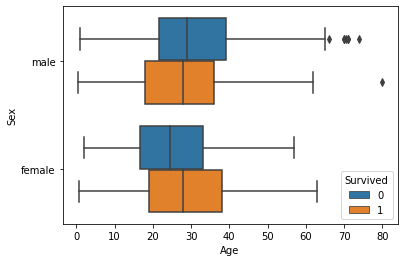

In [9]:
sns.boxplot(x='Age' , y='Sex', hue='Survived' ,data = df)
# the distribution of ages for males and females separately, and for each group,
# the boxplot will be colored differently based on whether they survived or not.
# This can help to visually explore any relationship between age, sex, and survival in the Titanic dataset.

In [1]:
sns.boxplot(x='Age' , y='Sex', hue='Survived' ,data = df_without_outliers)
# without outliers

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='Sex', ylabel='Age'>

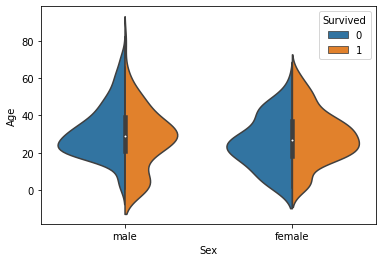

In [10]:
sns.violinplot(x='Sex', y='Age', data=df, hue="Survived",split=True)

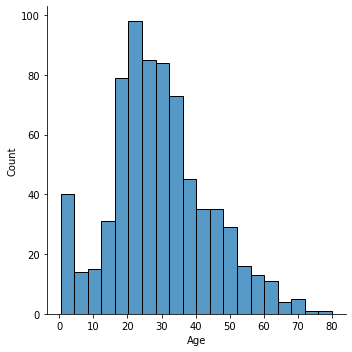

In [11]:
sns.displot(df['Age'])

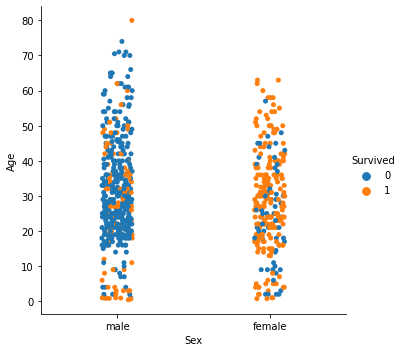

In [12]:
sns.catplot(x='Sex',y='Age' , data=df,hue='Survived')

/home/pict/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

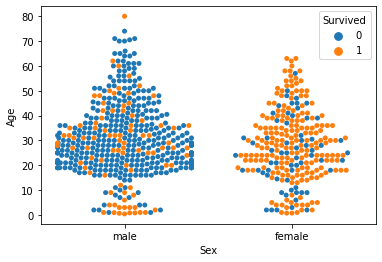

In [15]:
sns.swarmplot(x='Sex', y='Age', data=df, hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

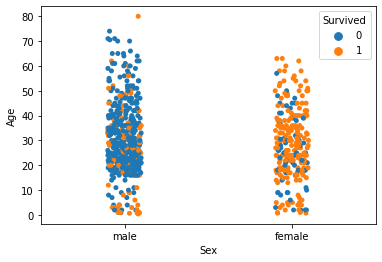

In [16]:
sns.stripplot(x='Sex', y='Age', data=df, hue='Survived')